<a href="https://colab.research.google.com/github/minjeon99/ESAA/blob/Week3/w3_fri_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **02. 사이킷런으로 시작하는 머신러닝**

## **05. 데이터 전처리**
- ML 알고리즘은 데이터에 기반하기 때문에 어떤 데이터를 입력으로 갖는지에 따라 결과가 크게 달라질 수 있음(Garbage In, Garbage, Out)
**사이킷런 ML 알고리즘 적용 전 데이터에 미리 처리해야 할 기본 사항**
- 결손값 = NaN, Null값 허용 X -> 고정된 다른 값으로 변환 필요
  - Null 값이 적은 경우 평균값 등으로 대체
  - Null 값이 대부분인 경우 피처 드롭
  - Null 값이 일정 수준 이상인 경우 기준은 없음 (결정 힘듦) 정밀한 대체 값 선정 등이 필요
- 문자열 입력 허용 X -> 인코딩해서 숫자형 변환 필요

### **데이터 인코딩**
1. 레이블 인코딩(Label encoding)
2. 원-핫 인코딩(One Hot encoding)

#### 레이블 인코딩
- `LabelEncoder` 클래스
  - `fit()`, `transform()` 호출

In [ ]:
from sklearn.preprocessing import LabelEncoder

items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


- 데이터가 **많은** 경우 문자열 값이 어떤 숫자 값으로 인코딩됐는지 직관적으로 알 수 없을 때: `classes_` 속성값으로 확인

In [ ]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


- 0번부터 순서대로 변환된 인코딩 값에 대한 원본값을 가짐
- `inverse_transform()`: 인코딩된 값을 다시 디코딩

In [ ]:
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- 두 개의 속성 가진 상품 데이터에서 상품 분류 레이블 인코딩 예시

  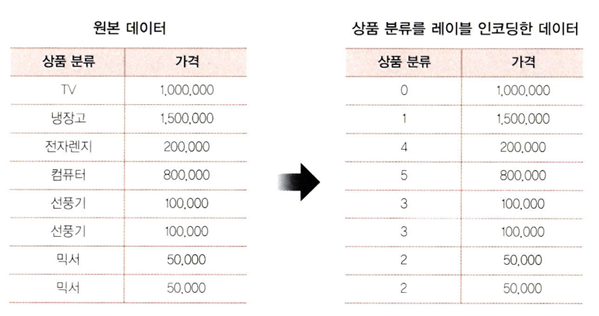

- **레이블 인코딩**

  : 일괄적인 숫자 값으로 변환
    
    -> 숫자의 크고 작음에 대한 특성 작용 (e.g. 냉장고: 1, 믹서:2
    
    -> 믹서에 가중치가 더 부여되거나 중요하게 인식될 수 있음)
    
    -> 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우 발생 가능
    
    => 선형 회귀와 같은 ML 알고리즘에는 적용 X (트리 계열: 숫자의 특성 반영 X -> 상관 X)
- **원-핫 인코딩**: 레이블 인코딩의 이러한 문제점 해결

#### **원-핫 인코딩(One-Hot Encoding)**
- 행 형태로 된 피처의 고유 값을 열 형태로 차원 변환 -> 고유 값에 해당하는 칼럼에만 1 표시, 나머지 칼럼에는 0 표시

  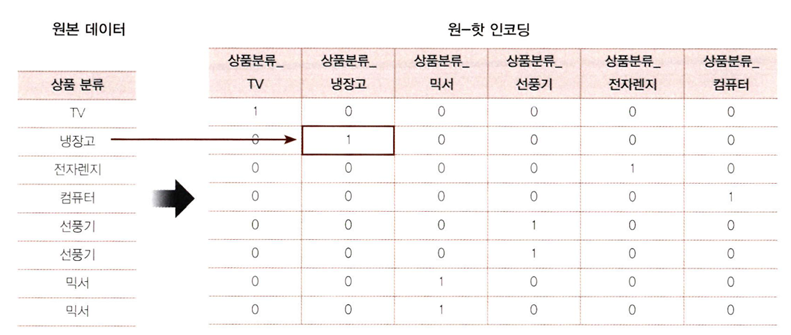
- `OneHotEncoder` 클래스로 변환
  - 모든 문자열 값 -> 숫자형 값으로 변환 필요
  - 입력 값으로 2차원 데이터 필요

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환
labels = labels.reshape(-1,1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


- (원본 데이터) 8개의 레코드와 1개의 칼럼 -> (변환) 8개의 레코드, 6개의 칼럼

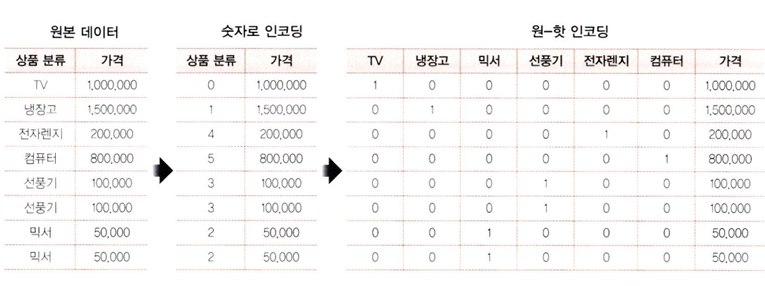
- 판다스에서 지원하는 원-핫 인코딩 API: `get_dummies()`
  - 문자열 카테고리 값을 숫자형으로 변환할 필요 X

In [ ]:
import pandas as pd

df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### **피처 스케일링과 정규화**
- **피처 스케일링**: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
  - **표준화(Standardization)**: 피처 각각이 평균 0, 분산 1인 가우시안 정규 분포를 가진 값으로 변환
$${x_i}\_new = \frac{x_i-mean(x)}{stdev(x)}$$
  - **정규화(Normalization)**: 서로 다른 피처의 크기 통일을 위해 크기를 변환하는 개념 (똑같은 단위로)
$${x_i}\_new = \frac{x_i-min(x)}{max(x)-min(x)}$$
- **벡터 정규화**
  - 사이킷런 `Normalizer` 모듈: 선형대수에서의 정규화 개념이 적용. 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미
  
    => 개별 벡터를 모든 피처 벡터의 크기로 나눔
$${x_i}\_new = \frac{x_i}{\sqrt {x_i^2+y_i^2+z_i^2}}$$

#### **StandardScaler**
- `StandardScaler` 클래스: 표준화 지원 = 가우시안 정규 분포로 변환
- 사이킷런에서 구현한 RBF 커널을 이용하는 SVD, 선형 회귀, 로지스틱 회귀
  
  : 데이터가 가우시안 분포 가지고 있다고 가정하고 구현 -> 표준화 적용이 예측 성능 향상에 중요한 요소

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


- `StandardScaler` 객체 생성 -> `fit()`, `transform()`에 변환 대상 피처 데이터 세트 입력 후 호출

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardSclaer로 데이터 세트 변환 - fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# tranfrom() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### **MinMaxScaler**
- `MinMaxScaler`: 데이터값을 0과 1 사이의 범위 값으로 변환(음수가 있으면 -1~1)
- 데이터의 분포가 가우시안 분포가 아닐 경우 적용해 볼 수 있음

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환 - fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


#### **학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점**
- `fit()`: 데이터 변환을 위한 기준 정보 설정(데이터 세트의 최댓값/최솟값 설정 등) 적용
- `transform()`: 설정된 정보를 이용해 데이터 변환
- `fit_transform()`: `fit()`과 `transform()`을 한번에 적용

**주의 사항**
- Scaler 객체를 이용해 학습 데이터 세트로 fit(), transform() 적용 시
  
  **테스트** 데이터 세트로는 **다시 fit()을 수행하지 않고 학습 데이터 세트로 fit() 수행한 결과를 이용해 transform()** 변환 적용해야 함

  = 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용

  (그렇지 않으면 학습/테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문)

In [ ]:
# 테스트 데이터에 fit() 적용시 발생하는 문제 알아보기

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

- 학습 데이터에 MinMaxScaler fit(): 최솟값 0, 최댓값 10이 설정되어 1/10 scale 적용
- 변환 시 원본 1 -> 0.1, 2 -> 0.2 ...

In [ ]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환 - 원본 10->1로 변환
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


- 테스트 데이터 세트 변환
  - fit() 호출해 스케일링 기준 정보 다시 적용한 뒤 transform() 수행 결과 확인

In [ ]:
# MiMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환 - 원본 5->1로 변환
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


- 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음

  -> 학습 데이터와 테스트 데이터의 서로 다른 원본값이 동일한 값으로 반환되는 결과 초래
- 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 함

In [ ]:
# 올바른 테스트 데이터 세트 변환

scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

# test_array에 Scale 변환할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


- 따라서 `fit_transform()`은 테스트 데이터에서는 절대 사용 X

**유의사항 정리**
1. 가능하면 전체 데이터의 스케일링 변환 적용 후 학습/테스트 데이터 분리
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환
- PCA와 같은 차원 축소 변환이나 텍스트의 피처 벡터화 변환 작업 시에도 동일하게 적용

## **06. 사이킷런으로 수행하는 타이타닉 생존자 예측**
- 타이타닉 탑승자 데이터

  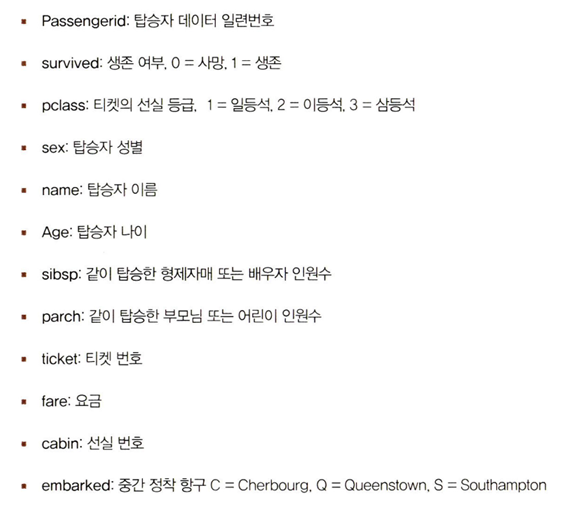

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('\n### 학습 데이터 정보 ###\n')
print(titanic_df.info())


### 학습 데이터 정보 ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- RangeIndex: DataFrame 인덱스의 범위 = 전체 로우 수
  - 891개의 로우
- 칼럼: 12개
  - float64 2개
  - int64 5개
  - object(=string) 5개
- Null 값
  - Age: 177개 -> 평균 나이로 처리
  - Cabin: 608개 -> 'N'값으로 처리
  - Embarked: 2개 -> 'N'값으로 처리

In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


- 남아있는 문자열 피처: Sex, Cabin, Embarked

In [6]:
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포:\n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


- Cabin
  - N이 687건으로 가장 많은 것도 특이
  - 속성값이 제대로 정리되지 X (e.g. 'C23 C25 C27' - 여러 Cabin이 한꺼번에 표기된 값이 4건)
  - 선실 등급 나타내는 첫 번째 알파벳이 중요해 보임 -> 앞 문자만 추출

In [7]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


**데이터 탐색**

**1. 어떤 유형의 승객이 생존 확률 높았는지 확인**
  - 여성, 아이들, 노약자가 제일 먼저 구조 대상
  - 아마도 부자, 유명인이 다음 구조 대상
  - 삼등실의 가난한 이는 생존 확률이 낮았을 것

**성별에 따른 생존자 수 비교**

In [8]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- Survived 칼럼: 레이블로서 결정 클래스 값 - 0: 사망, 1: 생존

<Axes: xlabel='Sex', ylabel='Survived'>

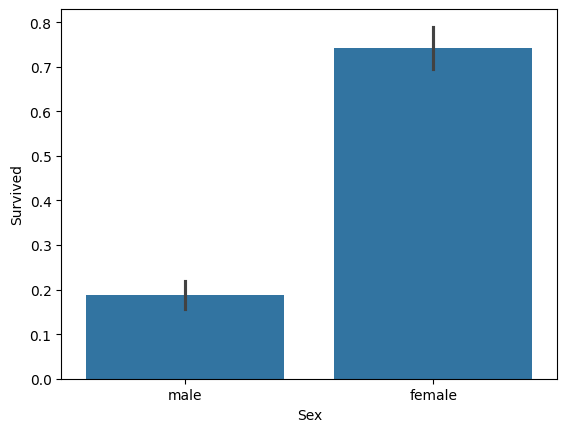

In [9]:
# Seaborn을 이용한 시각화
sns.barplot(x='Sex', y='Survived', data=titanic_df)

- 탑승객: 남자 577명, 여자 314명 -> 남자가 더 많음
- 생존자: 남자 109명(18.8%), 여자 233명(74.2%)

**객실 등급(부 측정 속성)에 따른 생존 확률 비교**

<Axes: xlabel='Pclass', ylabel='Survived'>

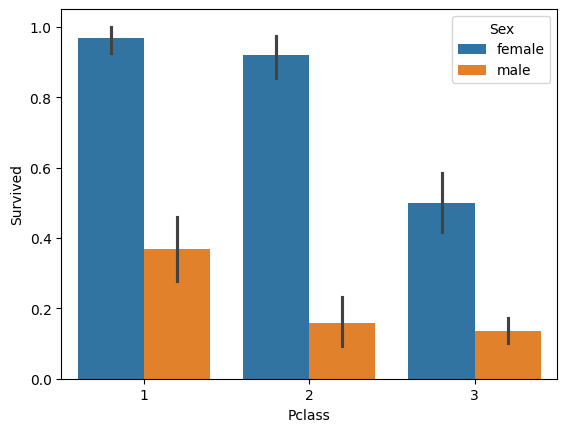

In [10]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

- 여성: 일, 이등실에 따른 생존 확률 차이는 크지 않으나 삼등실은 상대적으로 많이 떨어짐
- 남성: 일등실의 생존 확률이 이, 삼등실의 생존 확률보다 월등히 높음

**나이에 따른 생존 확률 비교**
- Age: 값이 많기 때문에 범위별로 분류해 카테고리 값 할당

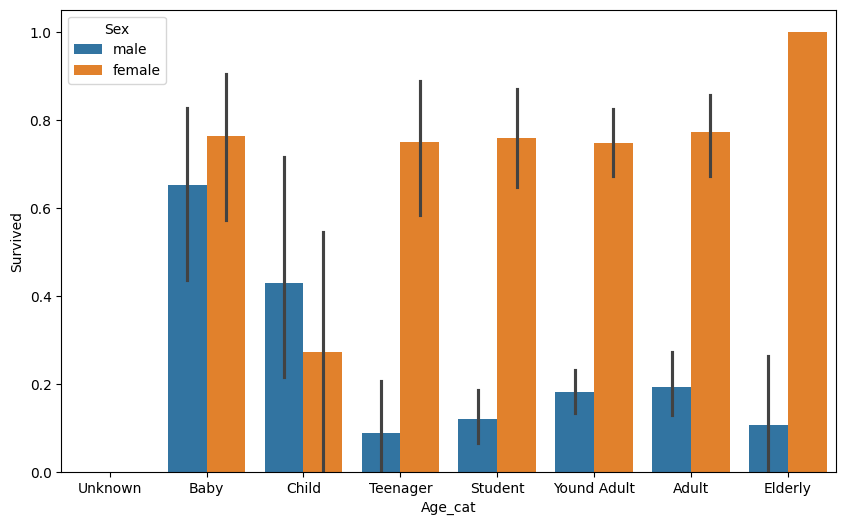

In [12]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
  cat = ''
  if age <= -1: cat='Unknown'
  elif age <= 5: cat='Baby'
  elif age <= 12: cat='Child'
  elif age <= 18: cat='Teenager'
  elif age <= 25: cat='Student'
  elif age <= 35: cat='Yound Adult'
  elif age <= 60: cat='Adult'
  else: cat='Elderly'

  return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Yound Adult', 'Adult', 'Elderly']

# lamda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

**분석 결과**
- 여자 Baby: 비교적 생존 확률이 높음
- 여자 Child: 다른 연령대에 비해 생존 확률이 낮음
- 여자 Elderly: 생존 확률이 매우 높음

=> Sex, Age, Pclass등이 중요하게 생존을 좌우하는 피처임을 확인 가능

- 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
  - LabelEncoder 클래스를 이용해 레이블 인코딩 적용

In [33]:
# 여러 칼럼을 한 번에 변환하는 함수 생성해서 사용

from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


- 지금까지 피처 가공한 내역 정리하고 재사용할 수 있도록 함수 생성
- `transform_features()`: Null처리, 포매팅, 인코딩 수행

In [34]:
from sklearn import preprocessing
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [35]:
# 원본 데이터 재로딩, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('/content/drive/MyDrive/ESAA_dataset/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

- 테스트 데이터 세트 추출 - 전체의 20%

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

- ML 알고리즘(결정 트리, 랜덤 포레스트, 로지스틱 회귀) 이용해 생존자 예측
- `train_test_split()`으로 분리한 학습/테스트 데이터를 기반으로 머신러닝 모델을 학습(fit), 예측(predict)
- 예측 성능 평가는 정확도 - `accuracy_score()` API 사용

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, RandomForest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- RandomForestClassifier 알고리즘이 타 알고리즘에 비해 높은 정확도 나타내고 있지만
  
  최적화 작업 수행 X, 데이터 양도 충분하지 X -> 아직 평가할 수 없음
- 교차 검증으로 결정 트리 모델을 좀 더 평가
  - `KFold` 클래스, `cross_val_score()`, `GridSearchCV` 클래스 모두 사용

In [38]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  # 폴드 세트를 5개인 KFold 객체 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold = KFold(n_splits=folds)
  scores = []

  # KFold 교차 검증 수행.
  for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

  # 5개 fold에서의 평균 정확도 계산.
  mean_score = np.mean(scores)
  print("평균 정확도: {0:.4f}".format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf , folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


**교차 검증**

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


- cross_val_score()와 K 폴드의 평균 정확도가 약간 다름 - cross_val_score()가 StratifiedKFold를 이용해 분할하기 때문

**GridSearchCV**
- 최적 하이퍼 파라미터 찾고 예측 성능 측정

In [39]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


- max_depth=3, min_samples_leaf=1, min_samples_split=2
- 예측 정확도가 약 87.15%로 향상 (8% 이상)
  - 일반적으로 이정도 수준으로 증가하기는 어려움 - 테스트 데이터 세트가 작기 때문에 그런 것으로 보임